In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

## PDF - 25 Nodes - PG 100x100 - 40m trans range

In [140]:
df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_8\\data_spd_1_n_25_p_120_pdf_2.csv')

In [141]:
df.head()

,run,PauseTime,repetition,Module,echoedPk:count,echoedPk:sum(packetBytes),packetReceived:count,packetReceived:sum(packetBytes),packets received,packets sent,packetSent:count,packetSent:sum(packetBytes)
0,RandomWaypointMobility-SPD-A-145-20220217-20:4...,120,25,TARPNetwork.node[17].app[0],NaN,NaN,484.0,484000.0,484.0,900.0,900.0,900000.0
1,RandomWaypointMobility-SPD-A-123-20220217-20:3...,120,3,TARPNetwork.node[22].app[0],813.0,813000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,RandomWaypointMobility-SPD-A-122-20220217-20:3...,120,2,TARPNetwork.node[17].app[0],NaN,NaN,699.0,699000.0,699.0,900.0,900.0,900000.0
3,RandomWaypointMobility-SPD-A-120-20220217-20:3...,120,0,TARPNetwork.node[22].app[0],899.0,899000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,RandomWaypointMobility-SPD-A-146-20220217-20:4...,120,26,TARPNetwork.node[22].app[0],899.0,899000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [143]:
df = df.sort_values(by=['repetition'])

In [144]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

In [145]:
results = []
results_x = []
count = 0

for index, row in df_17.iterrows():
        x = df_22.iloc[count]["echoedPk:count"]
        res = round((row['packetReceived:count'] + x)/(x + row['packetSent:count']), 4) 
        results.append(res)
        res_x = round((x)/(row['packetSent:count']), 4) 
        results_x.append(res_x)
        count+=1


In [146]:
print (results)   

[0.7865, 0.8344, 0.8883, 0.7163, 0.8092, 0.881, 0.751, 0.7353, 0.7139, 0.7647, 0.7341, 0.7422, 0.8014, 0.7715, 0.7905, 0.7604, 0.8456, 0.7498, 0.8377, 0.8205, 0.7193, 0.8633, 0.6816, 0.7952, 0.7676, 0.7654, 0.7293, 0.6995, 0.6321, 0.7129]


In [147]:
print (results_x) 

[0.9989, 0.9122, 0.9989, 0.9033, 0.9222, 0.9989, 0.9678, 0.8889, 0.9844, 0.9878, 0.91, 0.8578, 0.9356, 0.8478, 0.9678, 0.8689, 0.9933, 0.7722, 0.9989, 0.9989, 0.8722, 0.8533, 0.7589, 0.8989, 0.8889, 0.97, 0.9989, 0.8633, 0.7578, 0.9311]


In [148]:
print("Mean:", round(sum(results) / len(results)*100,2))

Mean: 77.0


In [149]:
print("Mean:", round(sum(results_x) / len(results_x)*100,2))

Mean: 91.69


In [134]:
df_dd_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[99.66, 99.18, 99.48, 99.51, 99.51, 99.16, 98.99, 96.83]})

dd_x_errors = [0.266, 0.503, 0.33, 0.246, 0.352, 1.41, 1.7, 5.9]



df_spd_1_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[97.37, 92.87, 92.5, 94.33, 91.69, 95.44, 97.89, 96.21]})

spd_1_x_errors = [0.811, 1.05, 1.6, 1.46, 2.59, 2.22, 1.94, 2.9]


df_spd_2_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[99.01, 97.74, 98.34, 98.35, 98.26, 97.41, 98.85, 96.83]})

spd_2_x_errors = [0.404, 0.623, 0.723, 0.839, 0.884, 1.73, 1.7, 2.9]

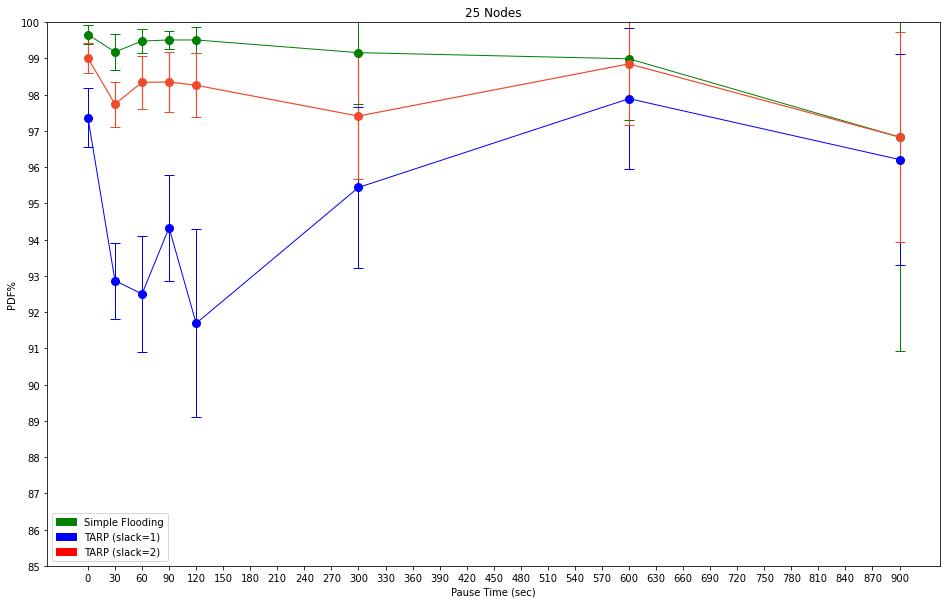

In [169]:
plt.xlabel("Pause Time (sec)")
plt.ylabel("PDF%")
plt.title("25 Nodes")

plt.xticks(np.arange(0,901, 30))
plt.yticks(np.arange(0,101, 1))
# plt.grid()

# plt.plot(df_dd_x.PauseTime, df_dd_x.PDF,  'g-x') 

# plt.plot(df_spd_1_x.PauseTime, df_spd_1_x.PDF,  'b-x') 

# plt.plot(df_spd_2_x.PauseTime, df_spd_2_x.PDF,  'r-x') 

plt.ylim([85, 100])

plt.errorbar(
  x=df_dd_x.PauseTime, 
  y=df_dd_x.PDF, 
  yerr=dd_x_errors, 
  capsize=5,
  marker='o', 
  color='green', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_1_x.PauseTime, 
  y=df_spd_1_x.PDF, 
  yerr=spd_1_x_errors, 
  capsize=5,
  marker='o', 
  color='blue', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_x.PauseTime, 
  y=df_spd_2_x.PDF, 
  yerr=spd_2_x_errors, 
  capsize=5,
  marker='o', 
  color='#EE4B2B', 
  markersize=8, 
  linewidth=1.2, 
  linestyle='-')

red_patch = mpatches.Patch(color='red', label='TARP (slack=2)')
green_patch = mpatches.Patch(color='green', label='Simple Flooding')
blue_patch = mpatches.Patch(color='blue', label='TARP (slack=1)')

plt.legend(handles=[ green_patch, blue_patch, red_patch])

fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.savefig('final-simulation-pdf-25-new.png', dpi=300)

In [227]:
df_tarp_1 = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_11\\data_spd_1_n_25_p_0_dpf.csv')
df_tarp_2 = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_11\\data_spd_2_n_25_p_0_dpf.csv')
df_sp = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_11\\data_dd_n_25_p_0_dpf.csv')

In [228]:
df_tarp_1

,run,PauseTime,repetition,Module,meanNbHops,nbDataPacketsForwarded,nbDataPacketsReceived,nbDataPacketsSent,nbSpdDrops
0,RandomWaypointMobility-SPD-A-16-20220213-16:10...,0,16,TARPNetwork.node[19].generic.np,NaN,816.0,0.0,0.0,NaN
1,RandomWaypointMobility-SPD-A-16-20220213-16:10...,0,16,TARPNetwork.node[18].generic.np,0.000000,766.0,0.0,0.0,531.0
2,RandomWaypointMobility-SPD-A-16-20220213-16:10...,0,16,TARPNetwork.node[8].generic.np,0.000000,873.0,0.0,0.0,387.0
3,RandomWaypointMobility-SPD-A-16-20220213-16:10...,0,16,TARPNetwork.node[9].generic.np,0.000000,850.0,0.0,NaN,448.0
4,RandomWaypointMobility-SPD-A-21-20220213-16:11...,0,21,TARPNetwork.node[9].generic.np,0.000000,783.0,0.0,0.0,467.0
...,...,...,...,...,...,...,...,...,...
741,RandomWaypointMobility-SPD-A-26-20220213-16:12...,0,26,TARPNetwork.node[11].generic.np,0.000000,836.0,0.0,0.0,559.0
742,RandomWaypointMobility-SPD-A-26-20220213-16:12...,0,26,TARPNetwork.node[8].generic.np,0.000000,739.0,0.0,0.0,661.0
743,RandomWaypointMobility-SPD-A-6-20220213-16:09:...,0,6,TARPNetwork.node[22].generic.np,1.737194,0.0,898.0,898.0,0.0
744,RandomWaypointMobility-SPD-A-6-20220213-16:09:...,0,6,TARPNetwork.node[23].generic.np,0.000000,701.0,0.0,0.0,651.0


In [222]:
df_tarp_1.Module = df_tarp_1.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]
df_tarp_2.Module = df_tarp_2.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]
df_sp.Module = df_sp.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [223]:
# Calculate the average
tarp_1_mean = np.mean(df_tarp_1.nbDataPacketsForwarded)
tarp_2_mean = np.mean(df_tarp_2.nbDataPacketsForwarded)
sp_mean = np.mean(df_sp.nbDataPacketsForwarded)

# Calculate the standard deviation
tarp_1_std = np.std(df_tarp_1.nbDataPacketsForwarded)
tarp_2_std = np.std(df_tarp_2.nbDataPacketsForwarded)
sp_std = np.std(df_sp.nbDataPacketsForwarded)

In [224]:
# Create lists for the plot
protocols = [ "Simple Flooding", 'TARP (slack=2)', 'TARP (slack=1)']
x_pos = np.arange(len(protocols))
CTEs = [sp_mean, tarp_2_mean, tarp_1_mean]
error = [sp_std, tarp_2_std, tarp_1_std]

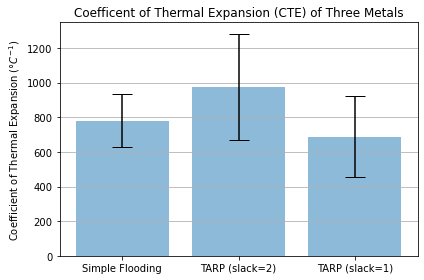

In [225]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels(protocols)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
# plt.savefig('bar_plot_with_error_bars.png')
plt.show()